In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X,y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: >

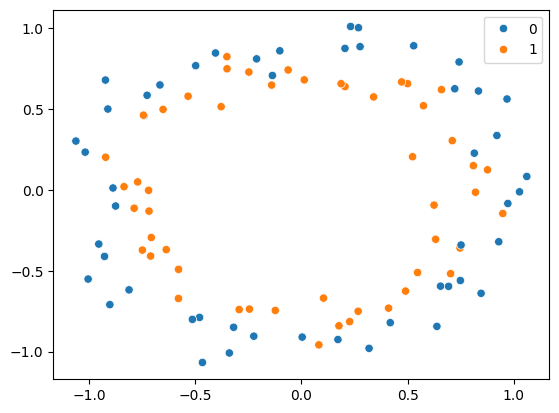

In [3]:
sns.scatterplot(x= X[:,0],y = X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.20, random_state = 2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test) ,epochs = 3500, verbose = 0)

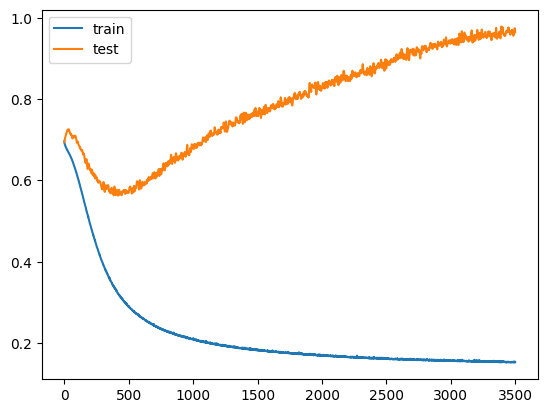

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


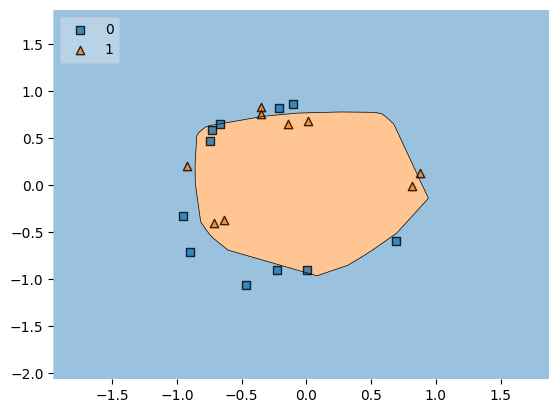

In [9]:
plot_decision_regions(X_test,y_test.ravel(),clf=model, legend=2)
plt.show()

# **Early Stopping**

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [17]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7117 - loss: 0.6380 - val_accuracy: 0.4500 - val_loss: 0.7127
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6922 - loss: 0.6400 - val_accuracy: 0.4500 - val_loss: 0.7104
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7289 - loss: 0.6295 - val_accuracy: 0.5500 - val_loss: 0.7097
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6867 - loss: 0.6330 - val_accuracy: 0.6000 - val_loss: 0.7093
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6773 - loss: 0.6360 - val_accuracy: 0.6500 - val_loss: 0.7072
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6516 - loss: 0.6354 - val_accuracy: 0.6500 - val_loss: 0.7050
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6938 - loss: 0.6344 - val_accuracy: 0.6000 - val_loss: 0.7034
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7141 - loss: 0.6345 - val_accuracy: 0.6000 - v

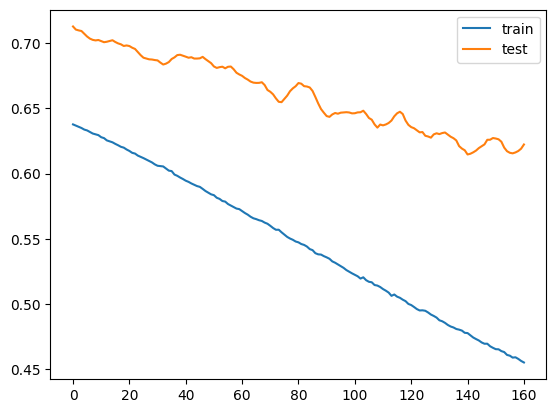

In [18]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


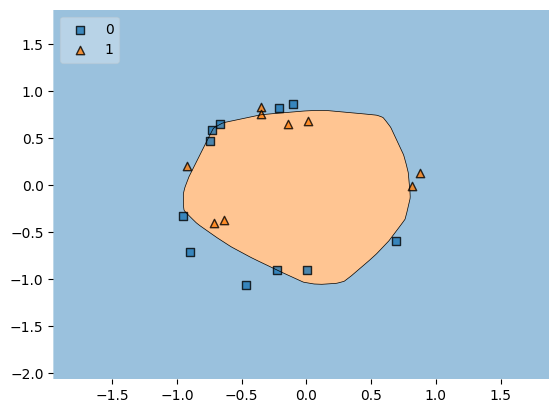

In [19]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()